# KNN Regression Model

## Objectives

- Evaluate the performance of k-Nearest Neighbors (KNN) regression models in predicting sales from advertising data.
- Determine the optimal number of neighbors (k) for KNN regression using GridSearchCV.

## Background

The notebook applies the KNN regression technique to predict sales based on advertising budgets across different media channels. This approach focuses on exploring the proximity of similar data points to predict continuous outcomes without complex computations.

## Datasets Used

Advertising.csv: Contains sales data for 200 markets with associated advertising spending across TV, radio, and newspaper.

## Introduction

The k-Nearest Neighbors algorithm (`KNN`) is a Machine Learning algorithm that solves classification and regression problems. The method does not require highly complex calculations and is easy to interpret. It relies on the idea that similar data points are closer than the points that are far away from each other. It evaluates the `k` nearest neighbors of a given case to get conclusions.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_theme(rc={"figure.figsize":(6, 4)}) # set default figure size

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, root_mean_squared_error
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor

## The Data

The Advertising data set consists of the sales of a product in 200 different markets, along with advertising budgets for the product in each of those markets for three different media: TV, radio, and newspaper.

In [3]:
# Getting data
df = pd.read_csv('advertising.csv')
print(df.shape)
df.head()

(200, 4)


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


### Descriptive Statistics

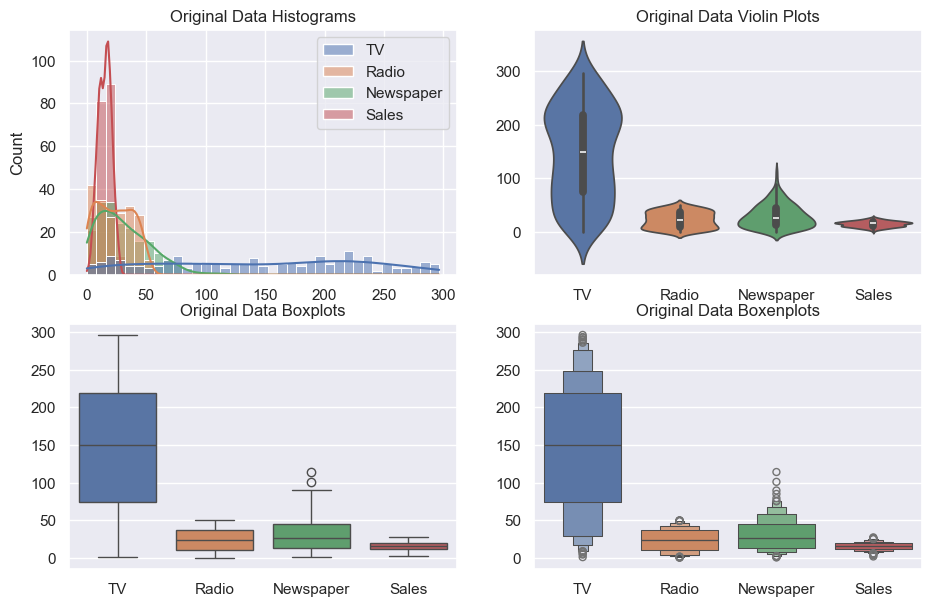

In [4]:
plt.figure(figsize=(11, 7))

plt.subplot(221)
sns.histplot(data = df, kde=True).set(title="Original Data Histograms")

plt.subplot(222)
sns.violinplot(data = df).set(title="Original Data Violin Plots")

plt.subplot(223)
sns.boxplot(data = df).set(title="Original Data Boxplots")

plt.subplot(224)
sns.boxenplot(data = df).set(title="Original Data Boxenplots");

### Standardizing

In [5]:
# Feature Scaling
scaler = preprocessing.StandardScaler()

In [6]:
dfs = pd.DataFrame(scaler.fit_transform(df), columns=['TV', 'Radio', 'Newspaper','Sales'])
dfs.head()

,TV,Radio,Newspaper,Sales
0,0.969852,0.981522,1.778945,1.322319
1,-1.197376,1.082808,0.669579,-0.897515
2,-1.516155,1.528463,1.783549,-0.593948
3,0.052050,1.217855,1.286405,0.259834
4,0.394182,-0.841614,1.281802,0.525455


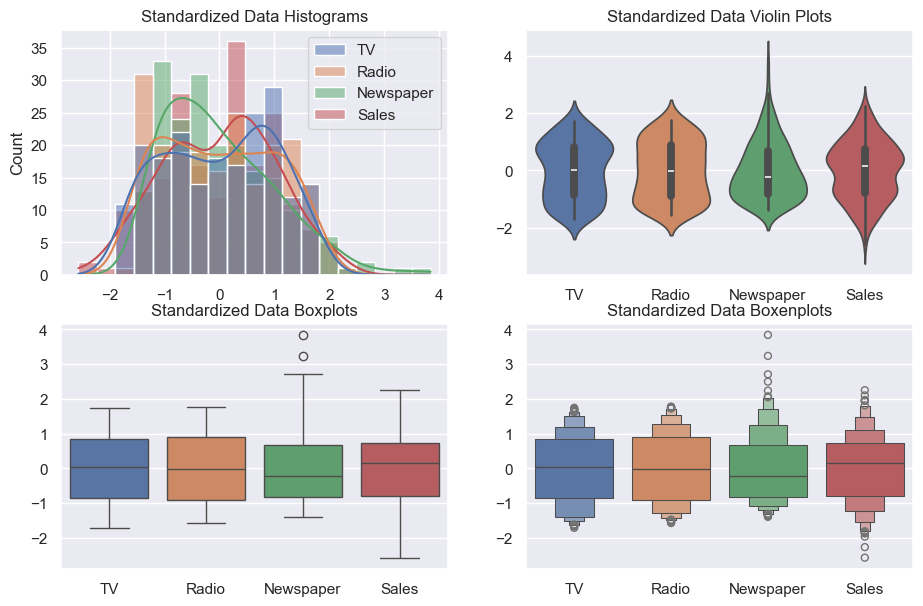

In [7]:
plt.figure(figsize=(11, 7))

plt.subplot(221)
sns.histplot(data = dfs, kde=True).set(title="Standardized Data Histograms")

plt.subplot(222)
sns.violinplot(data = dfs).set(title="Standardized Data Violin Plots")

plt.subplot(223)
sns.boxplot(data = dfs).set(title="Standardized Data Boxplots")

plt.subplot(224)
sns.boxenplot(data = dfs).set(title="Standardized Data Boxenplots");

## KNN Simple Regression Model

In [8]:
# Features matrix
X1 = dfs[['TV']]

In [9]:
# Target array
y = dfs[['Sales']]

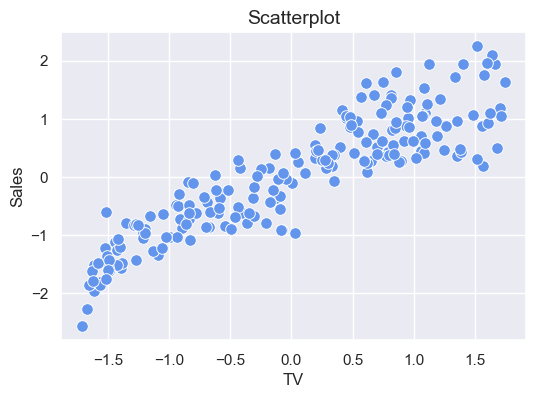

In [10]:
sns.scatterplot(x=dfs.TV, y=dfs.Sales, s=70, color='cornflowerblue').set_title('Scatterplot', size=14);

In [11]:
# Splitting the sample into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size=0.30, random_state=10)
print('Train Set: %i cases, \tTest Set: %i cases' %(X_train1.shape[0], X_test1.shape[0])) 

Train Set: 140 cases, 	Test Set: 60 cases


In [12]:
y_train1

,Sales
119,-1.618486
110,0.620320
95,0.335726
167,0.392645
193,0.847995
...,...
113,1.094643
64,0.164970
15,1.379237
125,-0.859569


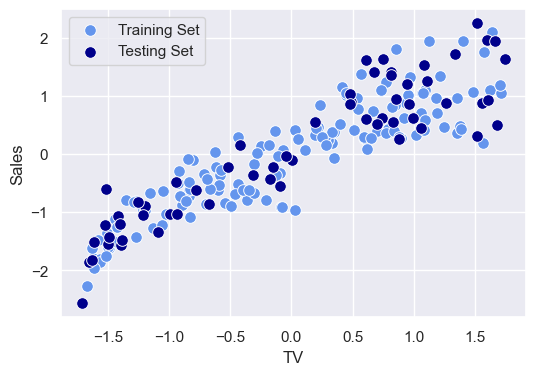

In [13]:
sns.scatterplot(x=X_train1.TV, y=y_train1.Sales, s=70, color='cornflowerblue', label='Training Set')
sns.scatterplot(x=X_test1.TV,  y=y_test1.Sales,  s=70, color='darkblue',       label='Testing Set');

In [14]:
# Saving training data
data_train1 = pd.concat([X_train1, y_train1], axis=1)
print(data_train1.shape)
data_train1.head()

(140, 2)


,TV,Sales
119,-1.490466,-1.618486
110,0.919642,0.620320
95,0.189837,0.335726
167,0.697781,0.392645
193,0.230706,0.847995


In [15]:
# Saving testing data
data_test1 = pd.concat([X_test1, y_test1], axis=1)
print(data_test1.shape)
data_test1.head()

(60, 2)


,TV,Sales
59,0.743321,0.620320
5,-1.615408,-1.504649
20,0.833233,0.544428
198,1.594565,1.967398
52,0.809879,1.417183


In [16]:
regressor1k3 = KNeighborsRegressor(n_neighbors=3)
regressor1k3.fit(X_train1, y_train1)

KNeighborsRegressor(n_neighbors=3)

In [17]:
# Prediction with training cases
data_train1['y_pred3'] = regressor1k3.predict(X_train1)
data_train1.head()

,TV,Sales,y_pred3
119,-1.490466,-1.618486,-1.523622
110,0.919642,0.620320,0.595023
95,0.189837,0.335726,0.417942
167,0.697781,0.392645,0.740482
193,0.230706,0.847995,0.538104


In [18]:
# Prediction with testing cases
data_test1['y_pred3'] = regressor1k3.predict(X_test1)
data_test1.head()

,TV,Sales,y_pred3
59,0.743321,0.620320,0.898590
5,-1.615408,-1.504649,-1.789243
20,0.833233,0.544428,0.683563
198,1.594565,1.967398,1.012427
52,0.809879,1.417183,0.538104


In [19]:
# Computing R² on unseen data
r2 = r2_score(data_test1.Sales, data_test1.y_pred3)

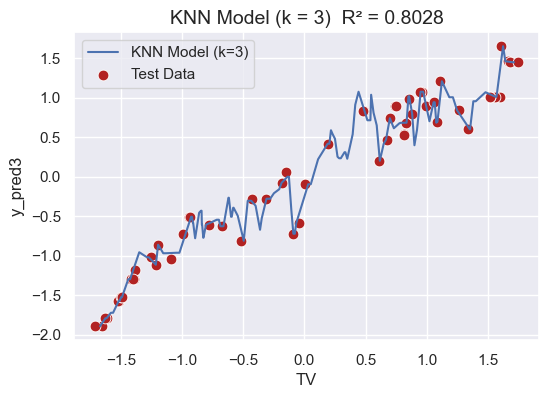

In [20]:
# Plotting the prediction model and the prediction on unseen data
# Plotting the prediction model
sns.lineplot(x=data_train1.TV, y=data_train1.y_pred3, label='KNN Model (k=3)')
# Plotting the testing values
sns.scatterplot(x=data_test1.TV, y=data_test1.y_pred3, s=60, color='firebrick', label='Test Data')
title = 'KNN Model (k = 3)  R² = %.4f' %(r2)
plt.title(title, size=14);

Let's create a function for analyzing the results with different `k` values.

In [21]:
def KNN_plot(df, k):
    '''
    Compute and plot KNN model.
    df is a DataFrame with two columns: X and y
    '''
    X_train, X_test, y_train, y_test = train_test_split(df[['X']], df[['y']], 
                                                        test_size=0.30, random_state=10)
    data_train = pd.concat([X_train, y_train], axis=1)
    data_test  = pd.concat([X_test,  y_test],  axis=1)
    regressor = KNeighborsRegressor(n_neighbors=k)
    regressor.fit(X_train, y_train)
    data_train['y_pred'] = regressor.predict(X_train)
    data_test['y_pred']  = regressor.predict(X_test)
    sns.lineplot(x=data_train.X, y=data_train.y_pred, label='KNN Model (k=%i)' %k);
    sns.scatterplot(x=data_test.X, y=data_test.y_pred, color='firebrick', s=60, label='Test Data')    
    r2 = r2_score(data_test.y, data_test.y_pred)
    title = 'KNN Model (k = %i)  R² = %.4f' %(k, r2)
    plt.title(title, size=14);

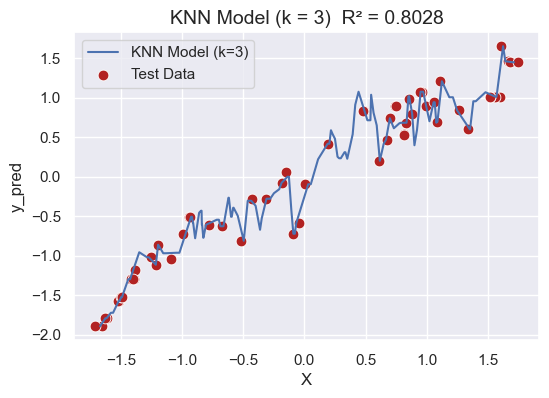

In [22]:
data = pd.DataFrame({'X':dfs.TV, 'y':dfs.Sales})
KNN_plot(data, 3)

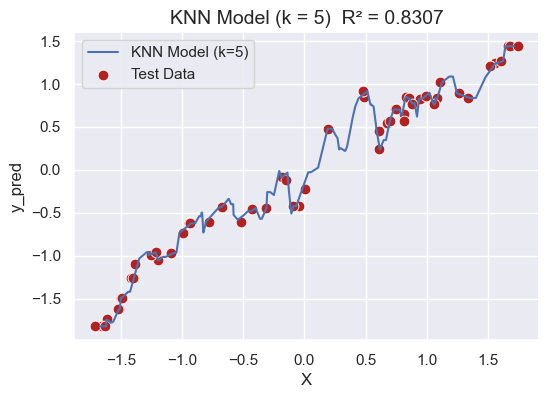

In [23]:
KNN_plot(data, 5)

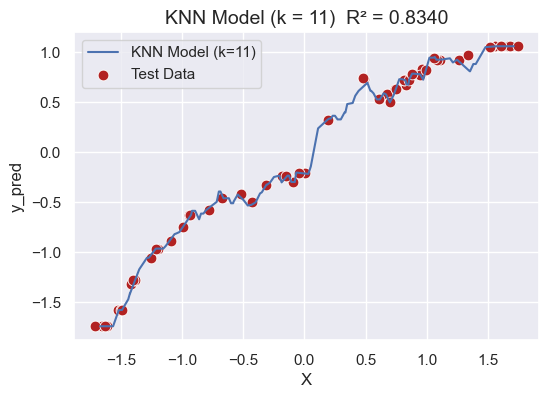

In [24]:
KNN_plot(data, 11)

## KNN Multiple Regression Model

Let's create a more complicated model. The feature matrix will now be composed of three variables: `TV`, `Radio`, and `Newspaper`. Notice that the graphical representation is not an option anymore.

In [25]:
# Features matrix
X2 = dfs[['TV','Radio','Newspaper']]

In [26]:
# Splitting the sample into train and test sets.
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.30, random_state=20)
print('Train Set: %i cases, \tTest Set: %i cases' %(X_train2.shape[0], X_test2.shape[0])) 

Train Set: 140 cases, 	Test Set: 60 cases


In [27]:
# Saving training data
data_train2 = pd.concat([X_train2, y_train2], axis=1)
print(data_train2.shape)
data_train2.head()

(140, 4)


,TV,Radio,Newspaper,Sales
134,-1.286120,1.035541,1.613231,-0.821623
62,1.077280,-0.524253,-0.149788,1.056698
20,0.833233,0.299535,1.051643,0.544428
21,1.055093,-1.226498,-0.324708,0.449564
45,0.327624,-0.051588,0.043546,0.183943


In [28]:
# Saving testing data
data_test2 = pd.concat([X_test2, y_test2], axis=1)
print(data_test2.shape)
data_test2.head()

(60, 4)


,TV,Radio,Newspaper,Sales
150,1.560702,-0.632291,0.296721,0.183943
28,1.188210,0.259020,-0.352328,0.715185
13,-0.578502,-1.057689,-1.075027,-0.271408
178,1.513995,-1.415564,-0.315502,0.316753
109,1.265277,0.245516,-1.153281,0.885941


### KNN Regression Model with k = 3

In [29]:
regressor2k3 = KNeighborsRegressor(n_neighbors=3)
regressor2k3.fit(X_train2, y_train2)

KNeighborsRegressor(n_neighbors=3)

In [30]:
# Prediction with training cases
data_train2['y_pred3'] = regressor2k3.predict(X_train2)
data_train2.head()

,TV,Radio,Newspaper,Sales,y_pred3
134,-1.286120,1.035541,1.613231,-0.821623,-0.631894
62,1.077280,-0.524253,-0.149788,1.056698,1.056698
20,0.833233,0.299535,1.051643,0.544428,0.696212
21,1.055093,-1.226498,-0.324708,0.449564,0.398969
45,0.327624,-0.051588,0.043546,0.183943,0.234537


In [31]:
# Prediction with testing cases
data_test2['y_pred3'] = regressor2k3.predict(X_test2)
data_test2.head()

,TV,Radio,Newspaper,Sales,y_pred3
150,1.560702,-0.632291,0.296721,0.183943,0.810049
28,1.188210,0.259020,-0.352328,0.715185,0.677239
13,-0.578502,-1.057689,-1.075027,-0.271408,-0.518056
178,1.513995,-1.415564,-0.315502,0.316753,0.563401
109,1.265277,0.245516,-1.153281,0.885941,0.911238


In [32]:
# Computing R²
print('KNN Model (k = 3) Training Set: R² = %.4f' %(r2_score(data_train2.Sales, data_train2.y_pred3)))
print('KNN Model (k = 3) Testing  Set: R² = %.4f' %(r2_score(data_test2.Sales, data_test2.y_pred3)))

KNN Model (k = 3) Training Set: R² = 0.9475
KNN Model (k = 3) Testing  Set: R² = 0.8764


### KNN Regression Model with k = 5

In [33]:
regressor2k5 = KNeighborsRegressor(n_neighbors=5)
regressor2k5.fit(X_train2, y_train2)

KNeighborsRegressor()

In [34]:
# Prediction with training cases
data_train2['y_pred5'] = regressor2k5.predict(X_train2)
data_train2.head()

,TV,Radio,Newspaper,Sales,y_pred3,y_pred5
134,-1.286120,1.035541,1.613231,-0.821623,-0.631894,-0.415602
62,1.077280,-0.524253,-0.149788,1.056698,1.056698,0.920092
20,0.833233,0.299535,1.051643,0.544428,0.696212,0.700006
21,1.055093,-1.226498,-0.324708,0.449564,0.398969,0.362288
45,0.327624,-0.051588,0.043546,0.183943,0.234537,0.237067


In [35]:
# Prediction with testing cases
data_test2['y_pred5'] = regressor2k5.predict(X_test2)
data_test2.head()

,TV,Radio,Newspaper,Sales,y_pred3,y_pred5
150,1.560702,-0.632291,0.296721,0.183943,0.810049,0.772104
28,1.188210,0.259020,-0.352328,0.715185,0.677239,0.829022
13,-0.578502,-1.057689,-1.075027,-0.271408,-0.518056,-0.571180
178,1.513995,-1.415564,-0.315502,0.316753,0.563401,0.517866
109,1.265277,0.245516,-1.153281,0.885941,0.911238,0.718979


In [36]:
# Computing R²
print('KNN Model (k = 5) Training Set: R² = %.4f' %(r2_score(data_train2.Sales, data_train2.y_pred5)))
print('KNN Model (k = 5) Testing  Set: R² = %.4f' %(r2_score(data_test2.Sales, data_test2.y_pred5)))

KNN Model (k = 5) Training Set: R² = 0.9305
KNN Model (k = 5) Testing  Set: R² = 0.8635


### Computing RMSE for model comparison

Let's compute the square root of the average of the squared residuals (RMSE) for both models. 

In [37]:
# Computing RMSE on Training Sets
print('KNN Model (k = 3) Training Set - RMSE = %.4f' 
        %(root_mean_squared_error(data_train2.Sales, data_train2.y_pred3)))
print('KNN Model (k = 5) Training Set - RMSE = %.4f' 
        %(root_mean_squared_error(data_train2.Sales, data_train2.y_pred5)))

KNN Model (k = 3) Training Set - RMSE = 0.2182
KNN Model (k = 5) Training Set - RMSE = 0.2510


In [38]:
# Computing RMSE on Testing Sets
print('KNN Model (k = 3) Testing Set - RMSE = %.4f' 
        %(root_mean_squared_error(data_test2.Sales, data_test2.y_pred3)))
print('KNN Model (k = 5) Testing Set - RMSE = %.4f' 
        %(root_mean_squared_error(data_test2.Sales, data_test2.y_pred5)))

KNN Model (k = 3) Testing Set - RMSE = 0.3875
KNN Model (k = 5) Testing Set - RMSE = 0.4072


Remember, the lower the RMSE, the better a model fits a dataset. 

`k = 3` seems to be slightly better than the others, but how can we estimate a good value for `k`?

### Choosing the optimal k-value

Let's compute the `RMSE` and `R²` for all kNN models with `k` between 1 and 30.

In [39]:
# Define a range of k values to try
k_range = list(range(1, 31))

In [40]:
rmse_scores = np.array([])                          # Creating an array for storing RMSE values
r2_scores = np.array([])                            # Creating an array for storing R² values
for k in k_range:                                   # Checking all options between k=1 and k=30   
    model = KNeighborsRegressor(n_neighbors = k)
    model.fit(X_train2, y_train2)                   # Fitting the model with train data 
    pred_k = model.predict(X_test2)                 # Making predictions on testing data
    # Storing the RMSE and R² values
    rmse_scores = np.append(rmse_scores, root_mean_squared_error(y_test2, pred_k))
    r2_scores = np.append(r2_scores, r2_score(y_test2, pred_k))

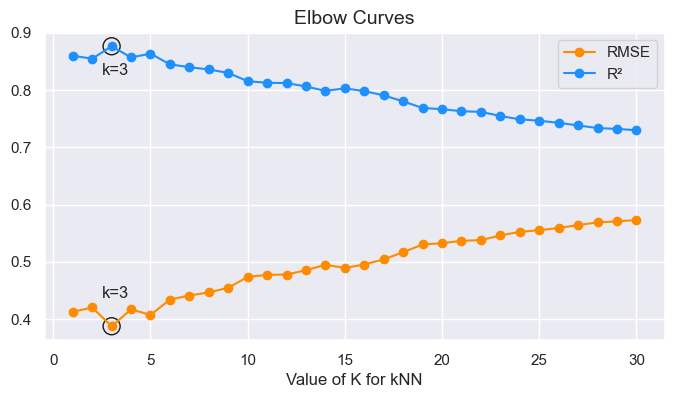

In [41]:
# Plotting 
plt.figure(figsize=(8, 4))

plt.plot(range(1, 31), rmse_scores, color='darkorange', marker='o', markersize=6, label='RMSE')
plt.scatter(rmse_scores.argmin()+1, rmse_scores.min(), s=150, linewidth=1, edgecolors='k', facecolors='none')
plt.text(rmse_scores.argmin()+0.5,  rmse_scores.min()+0.05,  r'k=%i' %(rmse_scores.argmin()+1))

plt.plot(range(1, 31), r2_scores,   color='dodgerblue', marker='o', markersize=6, label='R²')
plt.scatter(r2_scores.argmax()+1, r2_scores.max(), s=150, linewidth=1, edgecolors='k', facecolors='none')
plt.text(r2_scores.argmax()+0.5,  r2_scores.max()-0.05,  r'k=%i' %(r2_scores.argmax()+1))

plt.title('Elbow Curves', fontsize=14)
plt.xlabel('Value of K for kNN')
plt.legend();

`GridSearchCV` is a method for tuning hyperparameters in machine learning models. It is a powerful tool to find the best hyperparameters for your machine learning models. The `CV` in `GridSearchCV` stands for cross-validation. Let's use it!

In [42]:
kNN = KNeighborsRegressor()                 # Create a general kNN classification model
param_grid = dict(n_neighbors=k_range)      # Create a dictionary of hyperparameters to search

In `GridSearchCV`, the scoring metric for regression problems is typically the negative of the metric you want to optimize. That is because the optimization algorithms in scikit-learn are designed to maximize the score, while in regression problems, we want to minimize the error (e.g., minimize `RMSE`).

By taking the negative of the `RMSE`, we create a score that the optimization algorithm can maximize. In other words, higher scores (more positive values) indicate better performance, consistent with the optimization algorithm's objective.

In [43]:
# Use GridSearchCV with RMSE to find the optimal k value
grid_rmse = GridSearchCV(kNN, param_grid, cv=10, scoring='neg_root_mean_squared_error')
grid_rmse.fit(X_train2, y_train2)
mean_scores_rmse = grid_rmse.cv_results_['mean_test_score']
print("The optimal k value is {} with negative RMSE of {:.3f}".format(grid_rmse.best_params_['n_neighbors'], 
                                                                      grid_rmse.best_score_))

The optimal k value is 4 with negative RMSE of -0.316


In [44]:
# Use GridSearchCV with R² to find the optimal k value
grid_r2 = GridSearchCV(kNN, param_grid, cv=10, scoring='r2')
grid_r2.fit(X_train2, y_train2)
mean_scores_r2 = grid_r2.cv_results_['mean_test_score']
print("The optimal k value is {} with R² of {:.2f}%".format(grid_r2.best_params_['n_neighbors'], 
                                                            grid_r2.best_score_*100))

The optimal k value is 3 with R² of 86.03%


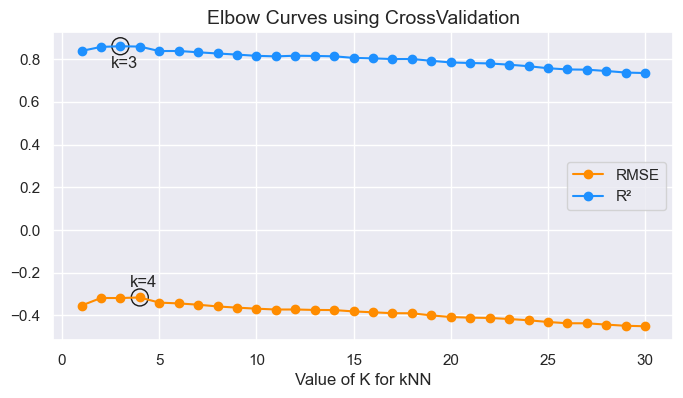

In [45]:
# Plotting 
plt.figure(figsize=(8, 4))

plt.plot(range(1, 31), mean_scores_rmse, color='darkorange', marker='o', markersize=6, label='RMSE')
plt.scatter(mean_scores_rmse.argmax()+1, mean_scores_rmse.max(), s=150, linewidth=1, edgecolors='k', facecolors='none')
plt.text(mean_scores_rmse.argmax()+0.5,  mean_scores_rmse.max()+0.05,  r'k=%i' %(mean_scores_rmse.argmax()+1))

plt.plot(range(1, 31), mean_scores_r2,   color='dodgerblue', marker='o', markersize=6, label='R²')
plt.scatter(mean_scores_r2.argmax()+1, mean_scores_r2.max(), s=150, linewidth=1, edgecolors='k', facecolors='none')
plt.text(mean_scores_r2.argmax()+0.5,  mean_scores_r2.max()-0.1,  r'k=%i' %(mean_scores_r2.argmax()+1))

plt.title('Elbow Curves using CrossValidation', fontsize=14)
plt.xlabel('Value of K for kNN')
plt.legend();

Notice that this time, the k-values are different!

## Conclusions

Key Takeaways:
- KNN regression proved effective for modeling the relationships between advertising budgets and sales, with varying performance based on the number of neighbors (k) used.
- Standardizing the data helped achieve a more uniform scale for better distance calculations in the KNN algorithm.
- The model performed best with k=3 for the simple and multiple regression scenarios.
- RMSE and R² metrics showed that smaller values of k generally resulted in better model performance, but the risk of overfitting with very small k was evident.
- GridSearchCV identified k=4 and k=3 as the optimal parameters for minimizing RMSE and maximizing R², respectively. This suggests that model performance can vary slightly depending on the evaluation metric considered.

## References

- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
- VanderPlas, J. (2017) Python Data Science Handbook: Essential Tools for Working with Data. USA: O’Reilly Media, Inc, chapter 5